In [1]:
import numpy as np
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import pandas as pd
from glob import glob
import h5py
import os
import matplotlib.pyplot as plt


In [2]:

idx_all_trials = []
timing_all_trials = []
frame_offset_all_trials = []

daqData = '/Volumes/genie/Jihong_GENIE_stuff/debug/2021.02.12_000/plate_000/patch_attempt_0011_000/camera_clamp1_000/000/Camera/daqResult.ma'
imgData = '/Volumes/genie/Jihong_GENIE_stuff/debug/2021.02.12_000/plate_000/patch_attempt_0011_000/camera_clamp1_000/000/Camera/frames.ma'

daqData = h5py.File(daqData,'r')
V_SYNC = daqData['data'][()][1]


peak_indices = np.where(V_SYNC==1)
peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
peak_index = peak_indices[0][peak_index]
peak_index_ms = peak_index/40.0 # change to ms
#             print(peak_index.shape)
for i in range(peak_index.shape[0]):
    if peak_index_ms[i]>=500.0:
#                     print(i,peak_index[i])
        idx = i
        break

stim_timing = peak_index[idx]
idx_all_trials.append(idx)
timing_all_trials.append(stim_timing)

imgData = h5py.File(imgData,'r')
imgData = imgData['data'][()]

F_all = []
for frame in range(imgData.shape[0]):
    F = np.mean(imgData[frame,240:272,:])
    F_all.append(F)

OSError: Unable to open file (unable to open file: name = '/Volumes/genie/Jihong_GENIE_stuff/debug/2021.02.12_000/plate_000/patch_attempt_0011_000/camera_clamp1_000/000/Camera/daqResult.ma', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

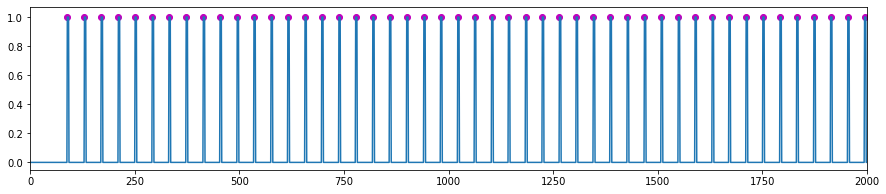

In [3]:
fig = plt.figure(figsize=[15,3])
plt.plot(V_SYNC)
plt.scatter(peak_index,np.ones(peak_index.shape),color='m')
i=0
plt.xlim([i,i+2000])
# plt.xlim([0,2000])
i=i+2000
# print(i)

In [4]:
print(len(peak_index_ms),len(F_all))
# peak_index_ms[-1]

1972 3267


Text(0, 0.5, 'F')

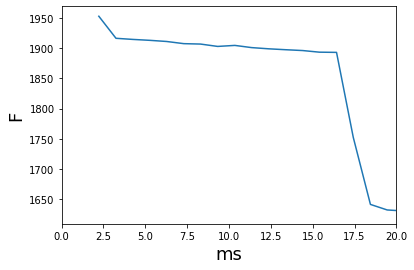

In [5]:

offset = 15
plt.plot(peak_index_ms[:1700],F_all[:1700])

## Frame drop deduction at F change
ylim = [1670,1710]
plt.xlim([0,20])
# plt.xlim([472-200,555-200])
# plt.ylim(ylim)
plt.plot([500-offset,500-offset],ylim,color='m')


# # Frame drop deduction at light on
# plt.xlim([230,260])
# ylim = [1620,1740]
# plt.ylim(ylim)
# plt.plot([250-offset,250-offset],ylim,color='m')


plt.plot([300-offset,300-offset],ylim,color='m')
plt.xlabel('ms',size=18)
plt.ylabel('F',size=18)
# plt.savefig('/Users/zhengj10/Desktop/F.png')

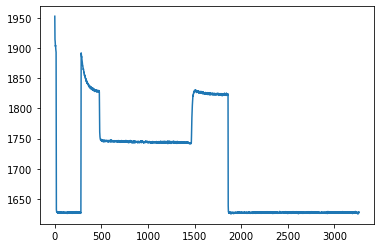

In [6]:
plt.plot(F_all)

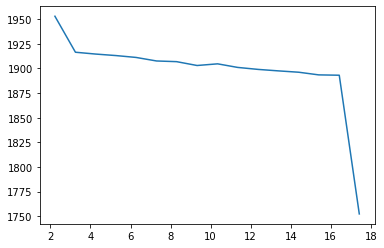

In [7]:
stop = 16
plt.plot(peak_index_ms[:stop],F_all[:stop])

In [ ]:
peak_index_ms
F_all

In [ ]:
fig = plt.figure(figsize=[15,3])
plt.plot(F_all)
i = 20
# plt.xlim([475,525])
# for q in range(122):
#     plt.plot(F_all[i:i+10])
#     i = i+10
# plt.savefig('/Users/zhengj10/Desktop/005.png')


In [ ]:
# fig = plt.figure(figsize=[10,80])
# # plt.plot(F_all)
# i = 20
# x = 1
# for q in range(50):
#     ax = plt.subplot(50,1,x)
#     ax.plot(F_all[i:i+20])
#     i = i+20
#     ax.set_ylabel(x)
#     x+=1
# plt.savefig('/Users/zhengj10/Desktop/008.png')


In [ ]:
F = np.array(F_all)

In [ ]:
len(peak_index)

In [ ]:
F_big = F>1670

In [ ]:
np.sum(F_big)

In [ ]:
F_big.shape

In [ ]:
# frame_offset_all_cells
# len(idx_all_cells)
# len(timing_all_cells)

In [ ]:
frame_offset = []
for i in range(len(frame_offset_all_cells)):
    frame_offset.append(frame_offset_all_cells[i][0])


In [ ]:
stim_idx = []
for i in range(len(idx_all_cells)):
    stim_idx.append(idx_all_cells[i][0])
    

In [ ]:
stim_timing = []
for i in range(len(timing_all_cells)):
    stim_timing.append(timing_all_cells[i][0])
    

In [ ]:
x = np.arange(no_cells)
plt.scatter(x,frame_offset)
# plt.ylim([479,485])
# plt.xlim([500,600])
# plt.savefig('/Users/zhengj10/Desktop/frames_offset_individual.png')
plt.show()

In [ ]:
np.median(frame_offset)

In [ ]:
plt.plot(F_all[idx-20:idx+20])
# plt.ylim([479,485])
# plt.xlim([2,10])


In [ ]:
plt.plot(stim_idx)
plt.ylim([470,494])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/stim_idx.png')
plt.show()

In [ ]:
plt.plot(stim_timing)
# plt.ylim([500.5,500.9])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/frames_offset.png')
plt.show()

In [ ]:
fig = plt.figure()
traces = df.traces.to_list()
x = np.linspace(-20,19,40)
for trace in traces:
    trace = np.array(trace)
    plt.plot(x,trace-trace[0])
plt.xlabel('frame#')
plt.ylabel('deltaF')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/Frames drop issue/traces.png',dpi=1200)


In [ ]:
df = pd.DataFrame({'cell_id':cell_id,'frame_offset':frame_offset,'stim_idx':stim_idx,'stim_timing':stim_idx,'traces':traces})

In [ ]:
df

In [ ]:
# df.to_pickle('/Users/zhengj10/Desktop/frames_drops.pkl')
# df.to_excel('/Users/zhengj10/Desktop/frames_drops.xlsx')

In [ ]:
ax = df.frame_offset.plot(kind='hist')
ax.set_xlabel('No. of frames offset')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
ax = df.frame_offset.plot()
ax.set_xlabel('Cell #')
ax.set_ylabel('No. of frames offset')
plt.show()

In [ ]:
dataPath = '/Volumes/Backup Plus/PatcherBot/raw/2020.10.15_000/plate_000/patch_attempt_0000_000/camera_clamp1_000/008'

In [ ]:
# dataFile = dataPath+'/Clamp1.ma'
# dataFile = dataPath+'Camera/daqResult.ma'
dataFile = dataPath+'/Camera/frames.ma'

In [ ]:
data = h5py.File(dataFile,'r')

In [ ]:
# data = data['data'][()]
data = data['info']['0']['values'][()]

In [ ]:
data.shape

In [ ]:
plt.plot(data[0])
plt.xlim([19990,20010])

In [ ]:
F_all = []
for frame in range(data.shape[0]):
    F = np.mean(data[frame,234:274,:])
    F_all.append(F)

In [ ]:
plt.plot(F_all)
plt.xlim([460,500])

In [ ]:
timing_info = []
for timing in range(data.shape[0]-1):
    timing_info.append(data[timing+1]-data[timing])

plt.plot(timing_info)

In [ ]:
class student:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def double_it(self,x):
        return x*2
    def get_mean(self,x):
        return np.mean(x)

        

In [ ]:
jihong = student('jihong',22)

In [ ]:
jihong.age

In [ ]:
jihong.double_it(10)

In [ ]:
jihong.get_mean([2,3])